<a href="https://colab.research.google.com/github/armandoordonez/deeplearning/blob/main/happy_house_hyperparameter_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descripción


* The train set has 600 examples. The test set has 150 examples. Caras felices (1) y no felices (0)
* Data Source: https://www.kaggle.com/iarunava/happy-house-dataset

In [139]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import h5py #It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy
import random


In [140]:
# Cargamos los datos desde drive
from google.colab import drive
(drive.mount('/content/gdrive'))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [143]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/gdrive/MyDrive/datasets/application_train.csv
/content/gdrive/MyDrive/datasets/application_test.csv
/content/gdrive/MyDrive/datasets/test_catvnoncat.h5
/content/gdrive/MyDrive/datasets/train_catvnoncat.h5
/content/gdrive/MyDrive/datasets/torre.png
/content/gdrive/MyDrive/datasets/torre.jpg
/content/gdrive/MyDrive/datasets/gato.jpg
/content/gdrive/MyDrive/datasets/Crime_Incidents.csv
/content/gdrive/MyDrive/datasets/test_happy.h5
/content/gdrive/MyDrive/datasets/train_happy.h5


In [144]:
filename = '/content/gdrive/MyDrive/datasets/train_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key) #Names of the groups in HDF5 file.

list_classes
train_set_x
train_set_y


In [145]:
happy_training = h5py.File('/content/gdrive/MyDrive/datasets/train_happy.h5')
happy_testing  = h5py.File('/content/gdrive/MyDrive/datasets/test_happy.h5', "r")

In [146]:
X_train = np.array(happy_training["train_set_x"][:])
y_train = np.array(happy_training["train_set_y"][:])

X_test = np.array(happy_testing["test_set_x"][:])
y_test = np.array(happy_testing["test_set_y"][:])

#print(X_train, y_train, X_test, y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(600, 64, 64, 3) (600,) (150, 64, 64, 3) (150,)


Visualización del datase

1


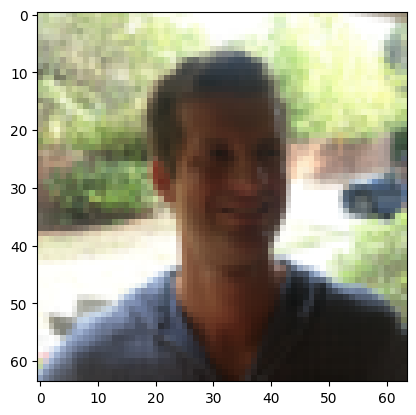

In [147]:
i = random.randint(1,600) # select any random index from 1 to 600
plt.imshow( X_train[i] )
print(y_train[i])

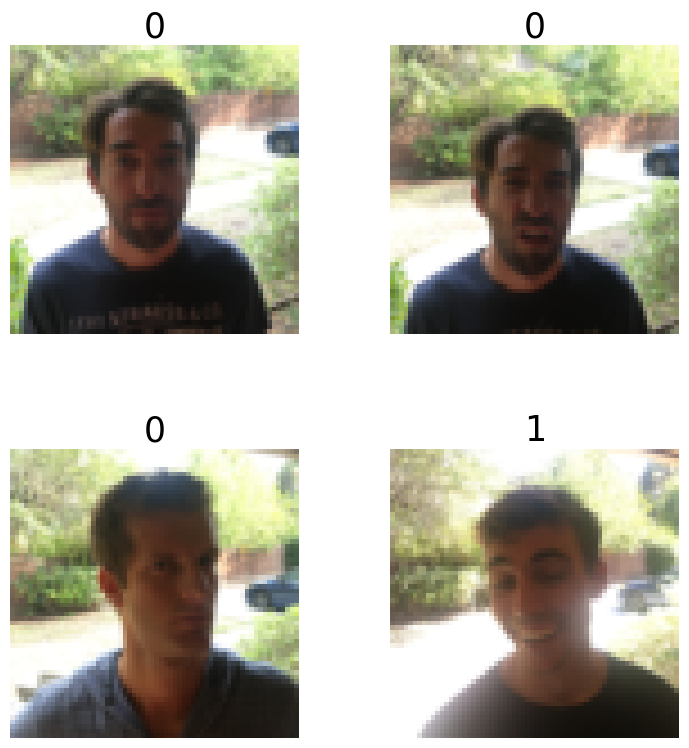

In [148]:

ancho_cuadro = 2
long_cuadro = 2

fig, axes = plt.subplots(ancho_cuadro, long_cuadro, figsize = (9,9))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, ancho_cuadro * long_cuadro): # create evenly spaces variables

    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# Entrenamiento del modelo

In [149]:
# Let's normalize dataset
X_train = X_train/255
X_test = X_test/255

In [150]:
X_train.shape

(600, 64, 64, 3)

In [151]:
X_train_flat = X_train.flatten().reshape(600, 64*64*3)
X_train_flat.shape

(600, 12288)

In [152]:
X_test_flat = X_test.flatten().reshape(150, 64*64*3)
X_test_flat.shape

(150, 12288)

In [190]:
from keras import models
from keras.layers import Dense
from keras import layers

original_model = models.Sequential()
original_model.add(Dense(8, activation='relu', input_shape=(12288,)))
original_model.add(Dense(8, activation='relu'))
original_model.add(Dense(1, activation='sigmoid'))

original_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [191]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(12288,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [192]:
original_hist = original_model.fit(X_train_flat, y_train,
                                   epochs=50,
                                   batch_size=512,
                                   validation_data=(X_test_flat, y_test))

Epoch 1/50
2/2 [==============================] - 2s 446ms/step - loss: 1.1468 - acc: 0.5000 - val_loss: 0.9620 - val_acc: 0.5600
Epoch 2/50
2/2 [==============================] - 0s 71ms/step - loss: 1.0306 - acc: 0.5033 - val_loss: 0.6934 - val_acc: 0.4400
Epoch 3/50
2/2 [==============================] - 0s 80ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6935 - val_acc: 0.4400
Epoch 4/50
2/2 [==============================] - 0s 65ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.4400
Epoch 5/50
2/2 [==============================] - 0s 61ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6937 - val_acc: 0.4400
Epoch 6/50
2/2 [==============================] - 0s 66ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6937 - val_acc: 0.4400
Epoch 7/50
2/2 [==============================] - 0s 69ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6937 - val_acc: 0.4400
Epoch 8/50
2/2 [==============================] - 0s 75ms/step - loss: 0.6932 - acc: 0.5000 - va

In [193]:
smaller_model_hist = smaller_model.fit(X_train_flat, y_train,
                                       epochs=50,
                                       batch_size=512,
                                       validation_data=(X_test_flat, y_test))

Epoch 1/50
2/2 [==============================] - 3s 392ms/step - loss: 0.7154 - acc: 0.5200 - val_loss: 0.6850 - val_acc: 0.5600
Epoch 2/50
2/2 [==============================] - 0s 105ms/step - loss: 0.6849 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4400
Epoch 3/50
2/2 [==============================] - 0s 87ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4400
Epoch 4/50
2/2 [==============================] - 0s 96ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.4400
Epoch 5/50
2/2 [==============================] - 0s 87ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.4400
Epoch 6/50
2/2 [==============================] - 0s 100ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.4400
Epoch 7/50
2/2 [==============================] - 0s 93ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.4400
Epoch 8/50
2/2 [==============================] - 0s 84ms/step - loss: 0.6931 - acc: 0.5000 - 

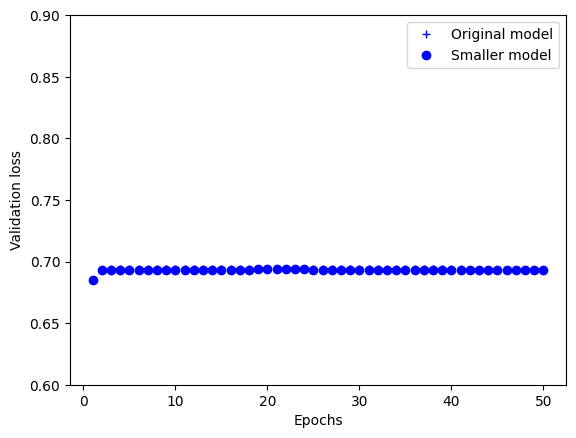

In [194]:
import matplotlib.pyplot as plt

epochs = range(1, 51)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.ylim([0.6, 0.9])
plt.show()

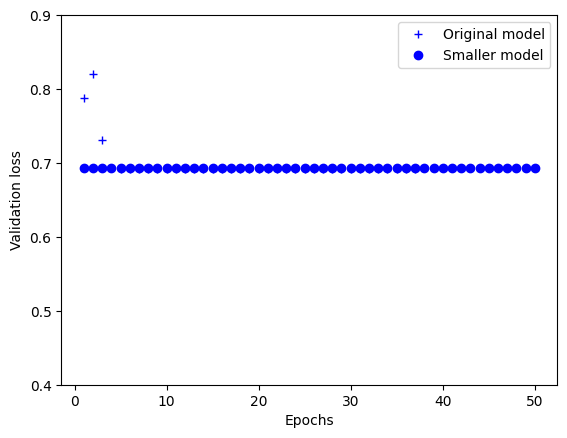

In [159]:
# Hacemos zoom

import matplotlib.pyplot as plt

epochs = range(1, 51)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.ylim([0.4, 0.9])
plt.show()

In [160]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(128, activation='relu', input_shape=(64*64*3,)))
bigger_model.add(layers.Dense(128, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['acc'])

bigger_model_hist = bigger_model.fit(X_train_flat, y_train,
                                     epochs=50,
                                     batch_size=512,
                                     validation_data=(X_test_flat, y_test))

Epoch 1/50
2/2 [==============================] - 1s 315ms/step - loss: 2.3867 - acc: 0.5167 - val_loss: 12.2875 - val_acc: 0.4400
Epoch 2/50
2/2 [==============================] - 0s 90ms/step - loss: 10.0109 - acc: 0.4967 - val_loss: 6.0461 - val_acc: 0.4400
Epoch 3/50
2/2 [==============================] - 0s 134ms/step - loss: 4.8753 - acc: 0.5000 - val_loss: 1.1607 - val_acc: 0.5600
Epoch 4/50
2/2 [==============================] - 0s 132ms/step - loss: 1.4731 - acc: 0.4667 - val_loss: 0.7088 - val_acc: 0.5600
Epoch 5/50
2/2 [==============================] - 0s 140ms/step - loss: 0.7633 - acc: 0.4867 - val_loss: 0.7399 - val_acc: 0.5600
Epoch 6/50
2/2 [==============================] - 0s 128ms/step - loss: 0.8056 - acc: 0.4833 - val_loss: 0.7266 - val_acc: 0.5600
Epoch 7/50
2/2 [==============================] - 0s 138ms/step - loss: 0.7694 - acc: 0.5000 - val_loss: 0.6761 - val_acc: 0.5600
Epoch 8/50
2/2 [==============================] - 0s 186ms/step - loss: 0.6875 - acc: 0.5

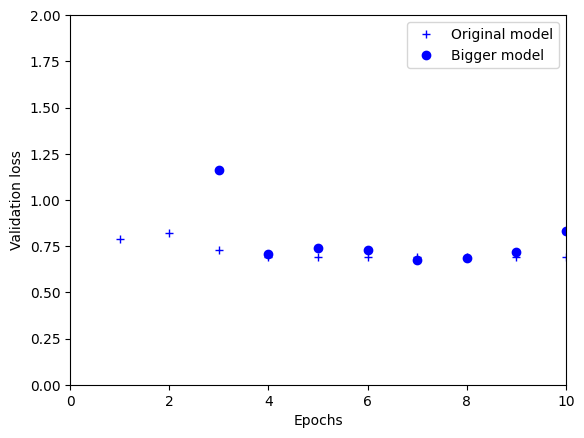

In [166]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

epochs = range(1, 51)

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.ylim(0,2)
plt.xlim(0,10)
plt.legend()

plt.show()

Epoch 1/50
2/2 [==============================] - 1s 375ms/step - loss: 0.6034 - acc: 0.6900 - val_loss: 0.7773 - val_acc: 0.4533
Epoch 2/50
2/2 [==============================] - 0s 106ms/step - loss: 0.7115 - acc: 0.4867 - val_loss: 0.7106 - val_acc: 0.4600
Epoch 3/50
2/2 [==============================] - 0s 95ms/step - loss: 0.6800 - acc: 0.5350 - val_loss: 0.6276 - val_acc: 0.6800
Epoch 4/50
2/2 [==============================] - 0s 91ms/step - loss: 0.6128 - acc: 0.7367 - val_loss: 0.6188 - val_acc: 0.5667
Epoch 5/50
2/2 [==============================] - 0s 147ms/step - loss: 0.6298 - acc: 0.5167 - val_loss: 0.6422 - val_acc: 0.6467
Epoch 6/50
2/2 [==============================] - 0s 191ms/step - loss: 0.6094 - acc: 0.7650 - val_loss: 0.7522 - val_acc: 0.5600
Epoch 7/50
2/2 [==============================] - 0s 154ms/step - loss: 0.9006 - acc: 0.4967 - val_loss: 0.6392 - val_acc: 0.6400
Epoch 8/50
2/2 [==============================] - 0s 194ms/step - loss: 0.6245 - acc: 0.6800

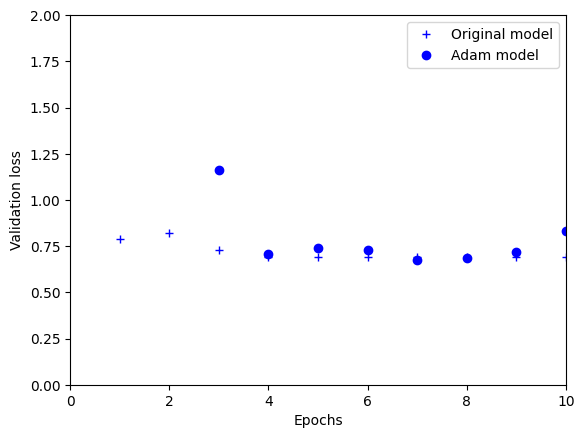

In [167]:
adam_model = models.Sequential()
adam_model.add(layers.Dense(8, activation='relu', input_shape=(64*64*3,)))
adam_model.add(layers.Dense(8, activation='relu'))
adam_model.add(layers.Dense(1, activation='sigmoid'))

adam_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['acc'])

adam_model_hist = bigger_model.fit(X_train_flat, y_train,
                                     epochs=50,
                                     batch_size=512,
                                     validation_data=(X_test_flat, y_test))



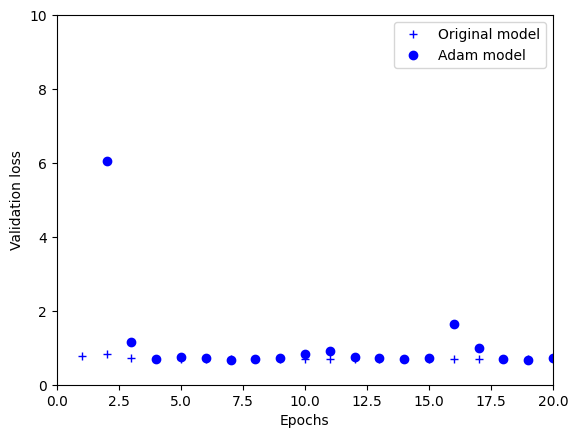

In [168]:
adam_model_val_loss = bigger_model_hist.history['val_loss']

epochs = range(1, 51)

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, adam_model_val_loss, 'bo', label='Adam model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.ylim(0,10)
plt.xlim(0,20)
plt.legend()

plt.show()

In [195]:
sgd_model = models.Sequential()
sgd_model.add(layers.Dense(8, activation='relu', input_shape=(64*64*3,)))
sgd_model.add(layers.Dense(8, activation='relu'))
sgd_model.add(layers.Dense(1, activation='sigmoid'))

sgd_model.compile(optimizer='sgd',
                     loss='binary_crossentropy',
                     metrics=['acc'])

sgd_model_hist = bigger_model.fit(X_train_flat, y_train,
                                     epochs=50,
                                     batch_size=120,
                                     validation_data=(X_test_flat, y_test))

Epoch 1/50
5/5 [==============================] - 0s 84ms/step - loss: 0.3021 - acc: 0.8833 - val_loss: 0.3818 - val_acc: 0.8333
Epoch 2/50
5/5 [==============================] - 0s 86ms/step - loss: 0.2139 - acc: 0.9183 - val_loss: 0.8747 - val_acc: 0.6467
Epoch 3/50
5/5 [==============================] - 0s 52ms/step - loss: 0.6770 - acc: 0.7250 - val_loss: 0.3544 - val_acc: 0.8467
Epoch 4/50
5/5 [==============================] - 0s 57ms/step - loss: 0.2301 - acc: 0.9150 - val_loss: 0.2703 - val_acc: 0.9067
Epoch 5/50
5/5 [==============================] - 0s 82ms/step - loss: 0.4034 - acc: 0.8183 - val_loss: 0.3557 - val_acc: 0.8533
Epoch 6/50
5/5 [==============================] - 0s 56ms/step - loss: 0.2411 - acc: 0.9233 - val_loss: 0.2708 - val_acc: 0.9067
Epoch 7/50
5/5 [==============================] - 0s 50ms/step - loss: 0.4121 - acc: 0.8333 - val_loss: 0.6226 - val_acc: 0.7000
Epoch 8/50
5/5 [==============================] - 0s 55ms/step - loss: 0.4176 - acc: 0.7983 - val

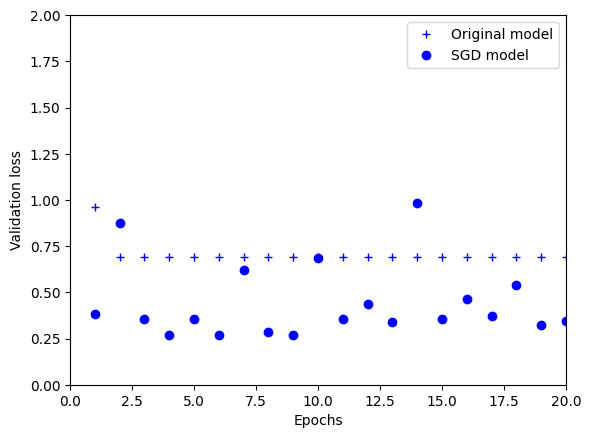

In [196]:
sgd_model_val_loss = sgd_model_hist.history['val_loss']

epochs = range(1, 51)

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, sgd_model_val_loss, 'bo', label='SGD model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.ylim(0,2)
plt.xlim(0,20)
plt.legend()

plt.show()

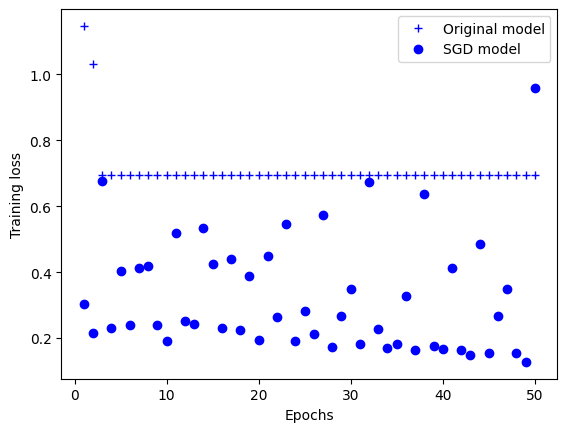

In [197]:
original_train_loss = original_hist.history['loss']
sgd_model_train_loss = sgd_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, sgd_model_train_loss, 'bo', label='SGD model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

Epoch 1/50
5/5 [==============================] - 0s 86ms/step - loss: 0.1891 - acc: 0.9017 - val_loss: 0.2826 - val_acc: 0.8800
Epoch 2/50
5/5 [==============================] - 0s 53ms/step - loss: 0.1516 - acc: 0.9583 - val_loss: 0.2394 - val_acc: 0.9333
Epoch 3/50
5/5 [==============================] - 0s 61ms/step - loss: 0.1618 - acc: 0.9350 - val_loss: 0.2679 - val_acc: 0.8800
Epoch 4/50
5/5 [==============================] - 0s 49ms/step - loss: 0.2807 - acc: 0.8767 - val_loss: 0.2190 - val_acc: 0.9067
Epoch 5/50
5/5 [==============================] - 0s 50ms/step - loss: 0.1435 - acc: 0.9500 - val_loss: 0.2296 - val_acc: 0.9200
Epoch 6/50
5/5 [==============================] - 0s 52ms/step - loss: 0.5620 - acc: 0.8167 - val_loss: 0.3090 - val_acc: 0.8267
Epoch 7/50
5/5 [==============================] - 0s 50ms/step - loss: 0.1720 - acc: 0.9417 - val_loss: 0.2314 - val_acc: 0.9267
Epoch 8/50
5/5 [==============================] - 0s 48ms/step - loss: 0.1384 - acc: 0.9433 - val

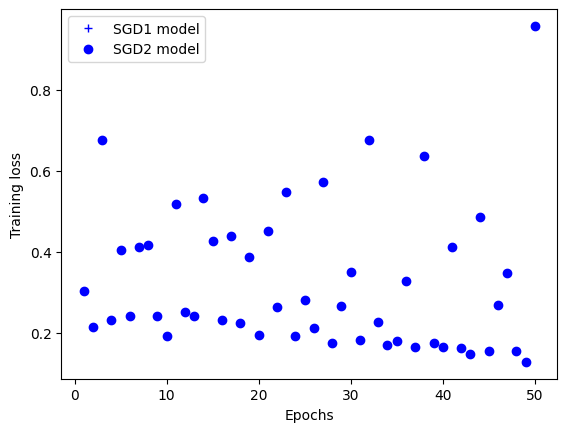

In [198]:
sgd2_model = models.Sequential()
sgd2_model.add(layers.Dense(16, activation='relu', input_shape=(64*64*3,)))
sgd2_model.add(layers.Dense(16, activation='relu'))
sgd2_model.add(layers.Dense(16, activation='relu'))
sgd2_model.add(layers.Dense(1, activation='sigmoid'))

sgd2_model.compile(optimizer='sgd',
                     loss='binary_crossentropy',
                     metrics=['acc'])

sgd2_model_hist = bigger_model.fit(X_train_flat, y_train,
                                     epochs=50,
                                     batch_size=120,
                                     validation_data=(X_test_flat, y_test))

sgd_model_train_loss = sgd_model_hist.history['loss']
sgd2_model_train_loss = sgd2_model_hist.history['loss']

plt.plot(epochs, sgd_model_train_loss, 'b+', label='SGD1 model')
plt.plot(epochs, sgd_model_train_loss, 'bo', label='SGD2 model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [169]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# STEP #5: EVALUATING THE MODEL

In [201]:
evaluation = sgd2_model.evaluate(X_test_flat, y_test)
print((evaluation))

5/5 [==============================] - 0s 7ms/step - loss: 0.6960 - acc: 0.4867
[0.6960191130638123, 0.4866666793823242]


In [182]:
# get the predictions for the test data
predicted_classes = original_model.predict(X_test_flat)


5/5 [==============================] - 0s 9ms/step


In [183]:
print("predicted_classes shape : ", predicted_classes.shape)
print("y_test shape : ", y_test.shape)

predicted_classes shape :  (150, 1)
y_test shape :  (150,)


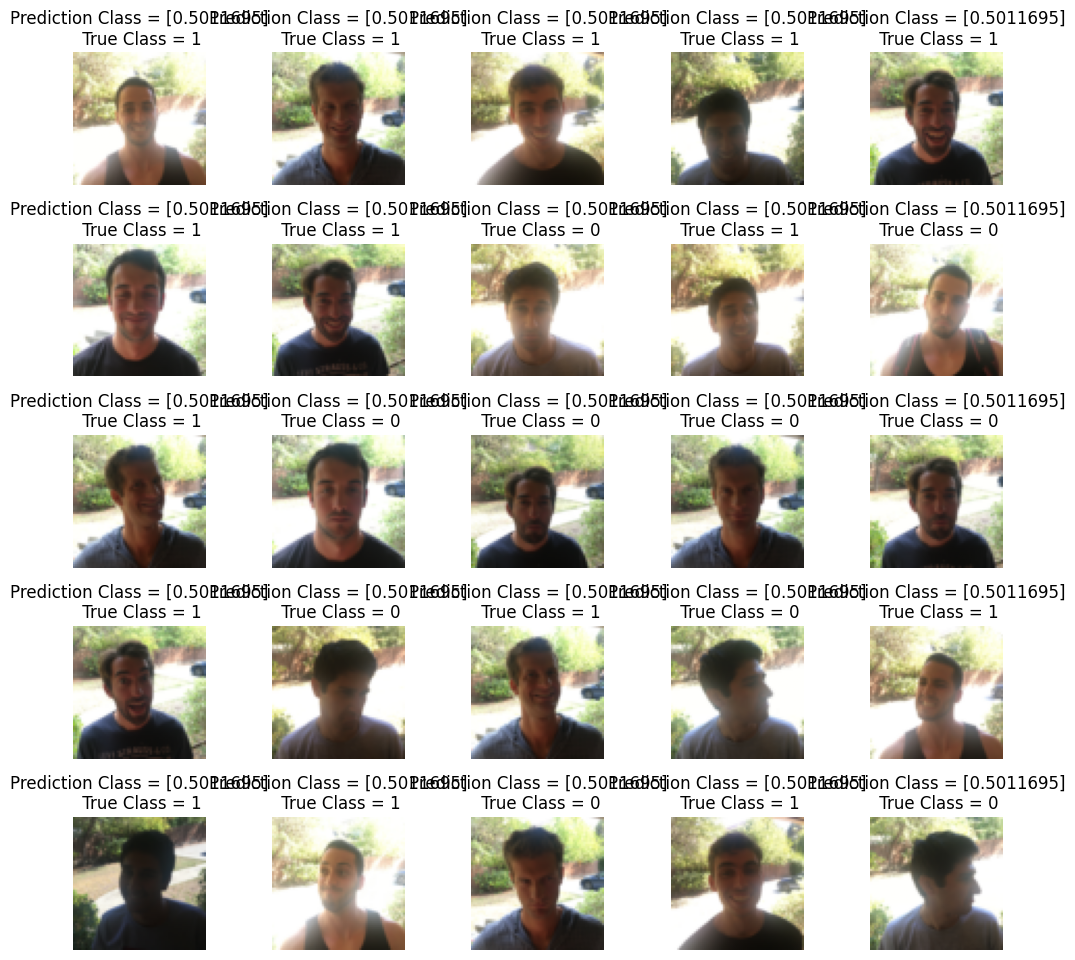

In [184]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.T, predicted_classes))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        66
           1       0.95      0.85      0.89        84

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

